In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
def annot_plot(ax,w,h):             # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))



In [2]:
matches=pd.read_csv(r"D:\My Folder\Internship (Data Science with Python)\IPL Prediction and Analysis\matches.csv")

In [3]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
matches.shape

(756, 18)

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
# Changing the names of teams whose Names have been changed in Further Seasons
matches.replace(to_replace= ['Delhi Daredevis'], value=['Delhi Capitals'], inplace=True)


In [9]:
teams= ['Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Royal Challengers Bangalore','Delhi Capitals', 'Rajasthan Royals', 'Kings XI Punjab']
matches_2 = matches[( matches.team1.isin(teams)) & ( matches.team2.isin(teams))]

In [10]:
#Giving Nicknames to the teams
nick = {'Sunrisers Hyderabad' : 'SRH' , 'Kolkata Knight Riders' : 'KKR',
       'Royal Challengers Bangalore' : 'RCB' , 'Kings XI Punjab' : 'KXIP',
       'Mumbai Indians' : 'MI' , 'Chennai Super Kings' : 'CSK' , 
       'Rajasthan Royals' : 'RR' , 'Delhi Capitals' : 'DC'
      }
#Replacing names with their Nicknames
matches_2.replace( nick , inplace = True )

C:\Users\Prem\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
matches_2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-17,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,7,2017,Mumbai,09-04-17,KKR,MI,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10-04-17,RCB,KXIP,RCB,bat,normal,0,KXIP,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
9,10,2017,Mumbai,12-04-17,SRH,MI,MI,field,normal,0,MI,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,13-04-17,KXIP,KKR,KKR,field,normal,0,KKR,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN


In [12]:
#filling the null values
matches_2['city'].fillna(matches_2['city'].mode()[0],inplace=True)

C:\Users\Prem\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
matches_2.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      2
venue                0
umpire1              1
umpire2              1
umpire3            332
dtype: int64

In [14]:
matches_2.shape

(437, 18)

In [15]:
matches_2['team1'].value_counts()

MI      71
KXIP    69
RCB     64
CSK     63
KKR     58
RR      54
SRH     52
DC       6
Name: team1, dtype: int64

In [16]:
matches_2['team2'].value_counts()

KKR     75
RCB     68
MI      67
CSK     65
KXIP    60
RR      59
SRH     33
DC      10
Name: team2, dtype: int64

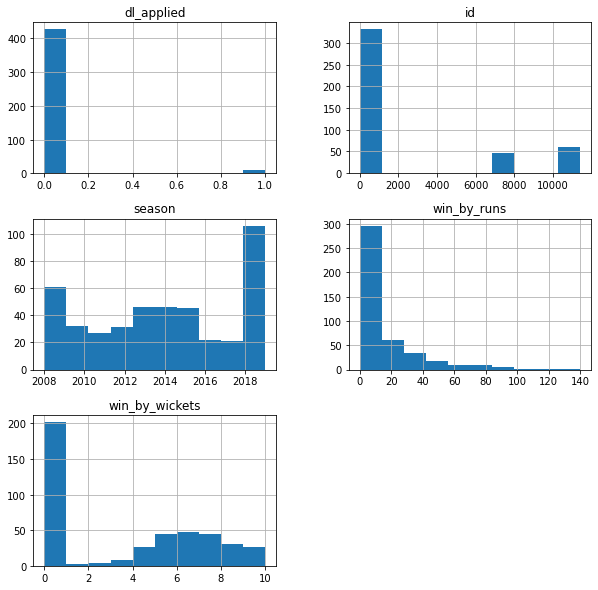

In [17]:
matches_2.hist(figsize=(10,10))
plt.show()

In [18]:
# Creating a list of Cities where the most number of matches have been played.
city_counts=matches_2["city"].value_counts()
city_counts

Mumbai            71
Kolkata           60
Bangalore         46
Chennai           42
Hyderabad         36
Jaipur            36
Chandigarh        33
Bengaluru         13
Durban            10
Delhi             10
Ahmedabad          9
Mohali             9
Pune               8
Centurion          6
Visakhapatnam      6
Ranchi             6
Indore             6
Abu Dhabi          6
Port Elizabeth     5
Dharamsala         4
Cape Town          4
Sharjah            4
Cuttack            3
Johannesburg       2
East London        1
Kimberley          1
Name: city, dtype: int64

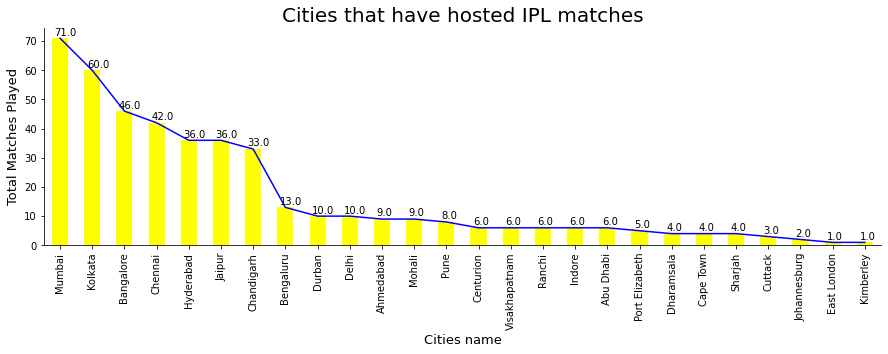

In [19]:
ax=city_counts.plot(kind="bar",color="yellow",figsize=(15,4))
city_counts.plot(color="blue")
plt.xlabel('Cities name',size=13)
plt.ylabel('Total Matches Played',size=13)
plt.title("Cities that have hosted IPL matches",size=20)
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

In [20]:
# total matches played by teams
total_mat=matches_2["team1"].value_counts()+matches_2["team2"].value_counts()
total_mat

CSK     128
DC       16
KKR     133
KXIP    129
MI      138
RCB     132
RR      113
SRH      85
dtype: int64

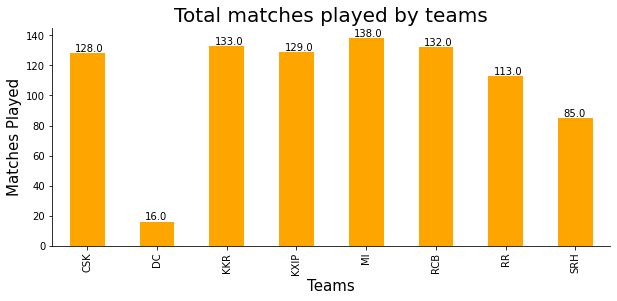

In [21]:
ax=total_mat.plot(kind="bar",color="orange",figsize=(10,4))
plt.xlabel("Teams",size=15)
plt.ylabel("Matches Played",size=15)
plt.title("Total matches played by teams",size=20)
annot_plot(ax,0.08,1)

In [22]:
# total matches win by a particular team
total_win=matches_2["winner"].value_counts()
total_win

MI      83
CSK     77
KKR     64
RCB     55
KXIP    54
RR      52
SRH     42
DC      10
Name: winner, dtype: int64

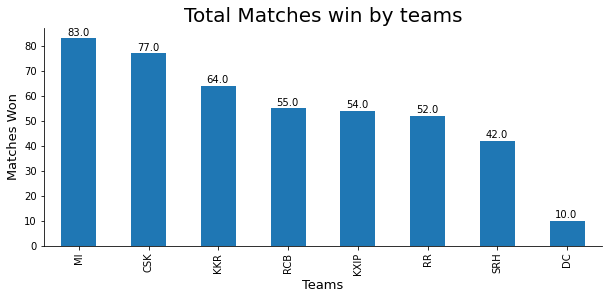

In [23]:
ax=matches_2["winner"].value_counts().plot(kind="bar",figsize=(10,4))
plt.xlabel("Teams",size=13)
plt.ylabel("Matches Won",size=13)
plt.title("Total Matches win by teams",size=20)
annot_plot(ax,0.08,1)

In [24]:
win_percent=(total_win/total_mat)*100
win_percent

CSK     60.156250
DC      62.500000
KKR     48.120301
KXIP    41.860465
MI      60.144928
RCB     41.666667
RR      46.017699
SRH     49.411765
dtype: float64

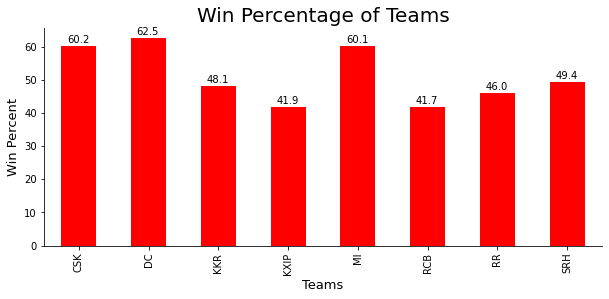

In [25]:
ax=win_percent.plot(kind="bar",color="red",figsize=(10,4))
plt.xlabel("Teams",size=13)
plt.ylabel("Win Percent",size=13)
plt.title("Win Percentage of Teams",size=20)
annot_plot(ax,0.08,1)

Text(0.5, 1.0, 'Win Percentage of Teams')

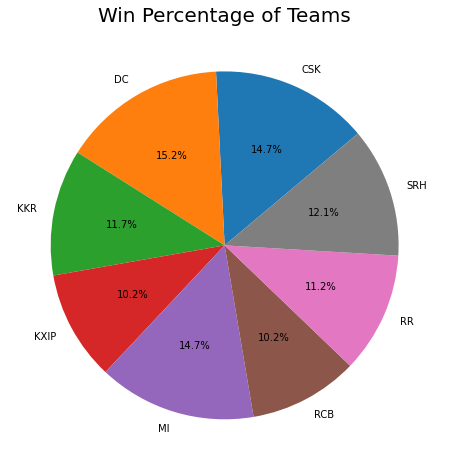

In [26]:
win_percent.plot(kind="pie",autopct='%1.1f%%',label="",startangle=40,figsize=(8,8))
plt.title("Win Percentage of Teams",size=20)

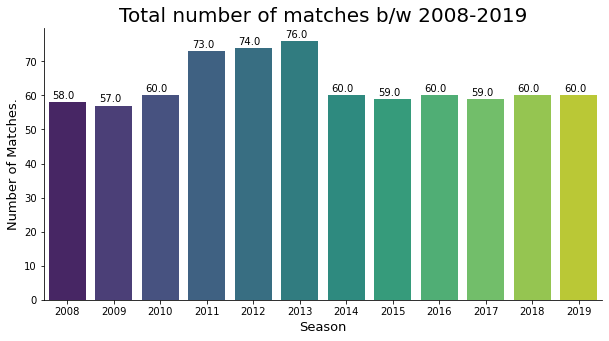

In [27]:
# Total number of matches between 2008-2019
total_num_of_matches = matches_2.groupby('season')['id'].count()
plt.figure(figsize=(10,5))
ax = sb.countplot("season", data = matches, palette='viridis')
plt.title('Total number of matches b/w 2008-2019',size=20)
plt.xlabel("Season",size=13)
plt.ylabel('Number of Matches.',size=13)
annot_plot(ax,0.08,1)
plt.show()

In [28]:
# number of Toss wins
toss_win=matches_2["toss_winner"].value_counts()
toss_win

MI      79
CSK     70
RR      64
KKR     64
KXIP    59
RCB     56
SRH     35
DC      10
Name: toss_winner, dtype: int64

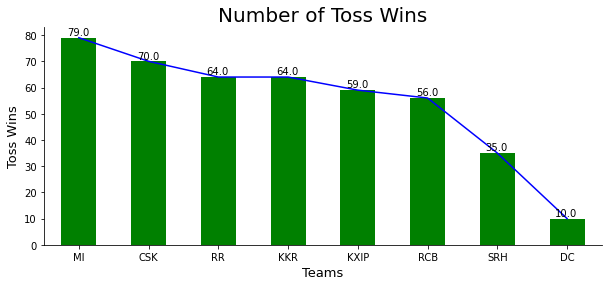

In [29]:
ax=toss_win.plot(kind="bar",color="green",figsize=(10,4))
toss_win.plot(color="blue")
plt.xlabel("Teams",size=13)
plt.ylabel("Toss Wins",size=13)
plt.title("Number of Toss Wins",size=20)
annot_plot(ax,0.08,1)

In [30]:
toss_win_percent=(toss_win/total_mat)*100
toss_win_percent

CSK     54.687500
DC      62.500000
KKR     48.120301
KXIP    45.736434
MI      57.246377
RCB     42.424242
RR      56.637168
SRH     41.176471
dtype: float64

Text(0.5, 1.0, 'Toss win percentage of Teams')

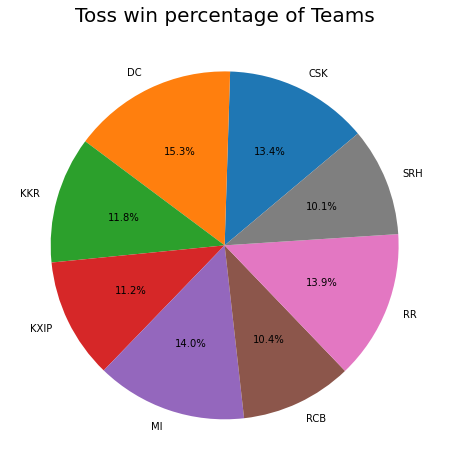

In [31]:
toss_win_percent.plot(kind="pie",autopct='%1.1f%%',label="",startangle=40,figsize=(8,8))
plt.title("Toss win percentage of Teams",size=20)

In [32]:
matches_2["player_of_match"]

0      Yuvraj Singh
6            N Rana
7          AR Patel
9         JJ Bumrah
10        SP Narine
           ...     
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 437, dtype: object

In [33]:
# Top 20 maximum player of the match
player=matches_2["player_of_match"].value_counts().head(20)

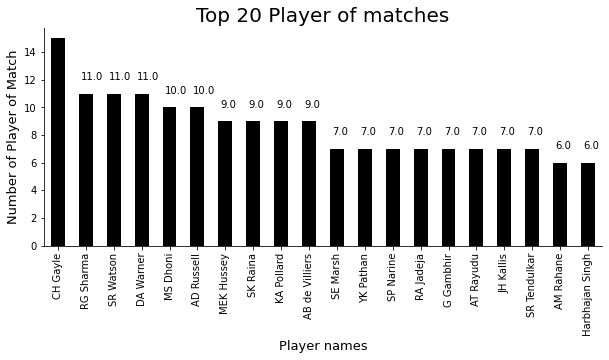

In [34]:

ax=player.plot(kind="bar",color="black",figsize=(10,4))
plt.xlabel("Player names",size=13)
plt.ylabel("Number of Player of Match",size=13)
plt.title("Top 20 Player of matches",size=20)
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)

Text(0.5, 1.0, 'Winners and Toss Winners')

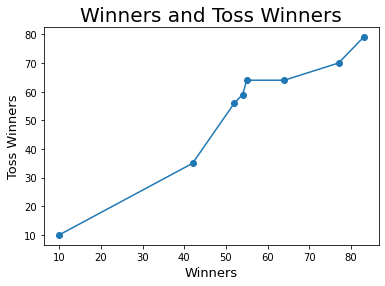

In [35]:
plt.scatter(x=total_win,y=toss_win)
plt.plot(total_win,toss_win)
plt.xlabel("Winners",size=13)
plt.ylabel("Toss Winners",size=13)
plt.title("Winners and Toss Winners",size=20)

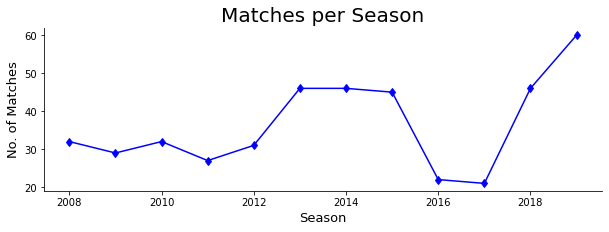

In [36]:
#No. of matches held each season
fig = plt.figure()
ax = fig.add_subplot(111)
ax=matches_2.groupby("season")["id"].count().plot(kind="line",title="Matches per season", marker='d',color=['blue'],figsize=(10,3)) 
plt.ylabel("No. of Matches",size=13)
plt.xlabel("Season",size=13)
plt.title("Matches per Season",size=20)
annot_plot(ax,0.08,1)
plt.show()

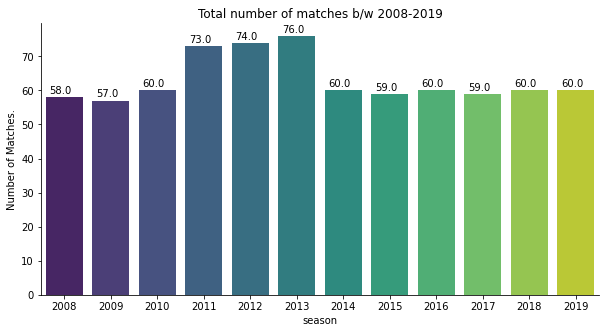

In [37]:
total_num_of_matches = matches.groupby('season')['id'].count()
plt.figure(figsize=(10,5))
ax = sb.countplot("season", data = matches, palette='viridis')
plt.title('Total number of matches b/w 2008-2019')
plt.ylabel('Number of Matches.')
annot_plot(ax,0.08,1)
plt.show()

Text(0.5, 1.0, 'Top 15 Stadium that have hosted IPL matches')

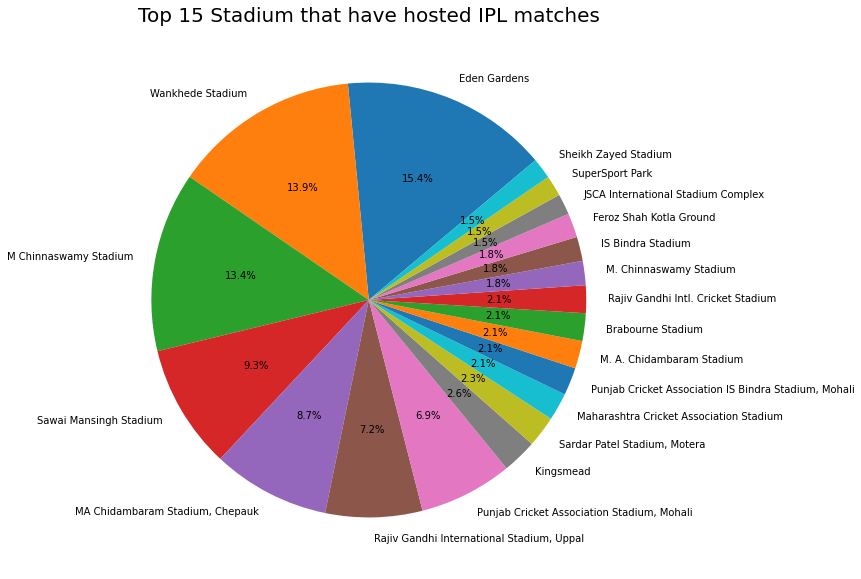

In [38]:
matches_2["venue"].value_counts().head(20).plot(kind="pie",autopct='%1.1f%%',label="",startangle=40,figsize=(10,10))
plt.title("Top 15 Stadium that have hosted IPL matches",size=20)

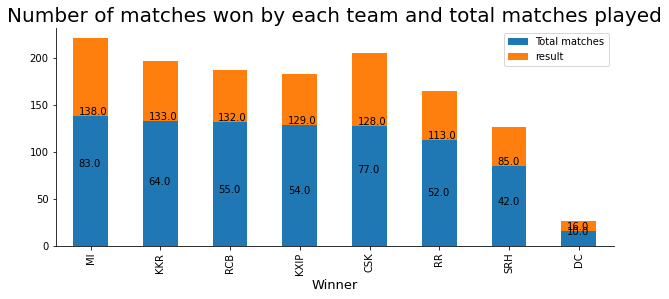

In [39]:
# Comparison between Number of matches won by each team and total matches played
matches_won = matches_2.groupby('winner').count()
matches_won

total_matches = matches_2['team1'].value_counts()+ matches_2['team2'].value_counts()
total_matches

matches_won['Total matches']=total_matches
ax=matches_won[["Total matches","result"]].sort_values(by=["Total matches"],ascending=False).plot.bar(stacked=True,figsize=(10,4))
plt.title("Number of matches won by each team and total matches played",size=20)
plt.xlabel("Winner",size=13)
annot_plot(ax,0.08,1)

In [40]:
season_winner = matches_2.groupby('season')['season','winner'].tail(1)
season_winner.sort_values(by="season",ascending=True)

<ipython-input-40-c2f00b20afe2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_winner = matches_2.groupby('season')['season','winner'].tail(1)


,season,winner
116,2008,RR
172,2009,RCB
233,2010,CSK
306,2011,CSK
380,2012,KKR
456,2013,MI
516,2014,KKR
575,2015,MI
635,2016,SRH
57,2017,MI


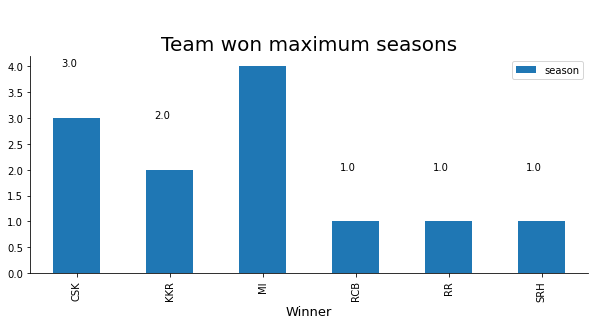

In [41]:
ax=season_winner.groupby('winner').count().plot.bar(figsize=(10,4))
plt.xlabel("Winner",size=13)
plt.title("Team won maximum seasons",size=20)
annot_plot(ax,0.08,1)
plt.show()

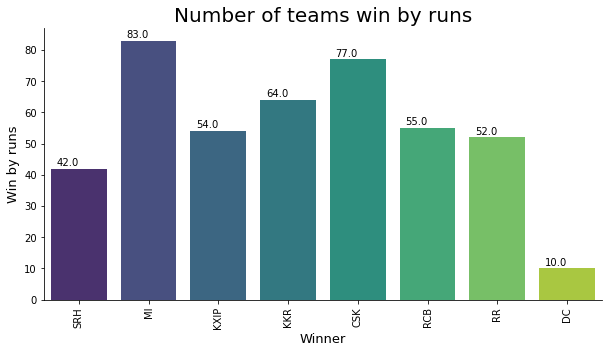

In [42]:
total_num1 = matches_2.groupby('winner')['win_by_runs'].count()
plt.figure(figsize=(10,5))
ax = sb.countplot("winner", data = matches_2, palette='viridis')
plt.title('Number of teams win by runs',size=20)
plt.ylabel('Win by runs',size=13)
plt.xlabel('Winner',size=13)
plt.xticks(rotation=90)
annot_plot(ax,0.08,1)
plt.show()

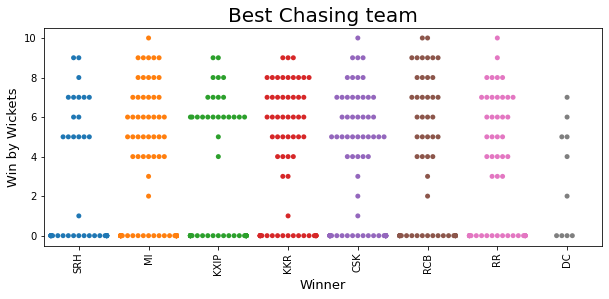

In [43]:
# Best Chasing Team
plt.figure(figsize=(10,4))
sb.swarmplot(y="win_by_wickets",x="winner",data=matches_2)
plt.xticks(rotation=90)
plt.xlabel("Winner",size=13)
plt.ylabel("Win by Wickets",size=13)
plt.title("Best Chasing team",size=20)
plt.show()

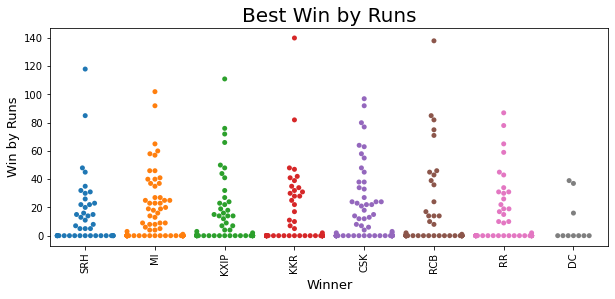

In [44]:
plt.figure(figsize=(10,4))
sb.swarmplot(y="win_by_runs",x="winner",data=matches_2)
plt.xticks(rotation=90)
plt.xlabel("Winner",size=13)
plt.ylabel("Win by Runs",size=13)
plt.title("Best Win by Runs",size=20)
plt.show()

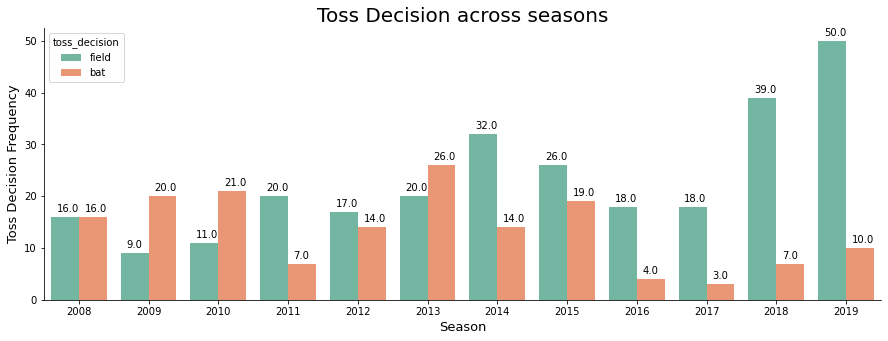

In [45]:
plt.figure(figsize=(15,5))
ax=sb.countplot(x="season",hue="toss_decision",data=matches_2,palette="Set2")
plt.ylabel("Toss Decision Frequency",size=13)
plt.xlabel("Season",size=13)
plt.title("Toss Decision across seasons",size=20)
annot_plot(ax,0.08,1)

In [46]:
#removing unnecessary data
matches_2.drop('umpire1', axis=1, inplace=True)
matches_2.drop('umpire2', axis=1, inplace=True)
matches_2.drop('umpire3', axis=1, inplace=True)
matches_2.drop('id',axis=1,inplace=True)
matches_2.drop('season',axis=1,inplace=True)
matches_2.drop('date',axis=1,inplace=True)
matches_2.drop('dl_applied',axis=1,inplace=True)
matches_2.drop('player_of_match',axis=1,inplace=True)

C:\Users\Prem\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
matches_2.isnull().sum()

city              0
team1             0
team2             0
toss_winner       0
toss_decision     0
result            0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
matches_2['team1']=lr.fit_transform(matches_2['team1'])
matches_2['team2']=lr.fit_transform(matches_2['team2'])
matches_2['toss_winner']=lr.fit_transform(matches_2['toss_winner'])
matches_2['toss_decision']=lr.fit_transform(matches_2['toss_decision'])
matches_2['city']=lr.fit_transform(matches_2['city'])
matches_2['venue']=lr.fit_transform(matches_2['venue'])
matches_2['result']=lr.fit_transform(matches_2['result'])
matches_2['winner']=lr.fit_transform(matches_2['winner'])

<ipython-input-48-0a50e8f124b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2['team1']=lr.fit_transform(matches_2['team1'])
<ipython-input-48-0a50e8f124b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2['team2']=lr.fit_transform(matches_2['team2'])
<ipython-input-48-0a50e8f124b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [49]:
matches_2.head(2)

,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,venue
0,13,7,5,5,1,1,7,35,0,25
6,20,2,4,4,1,1,4,0,4,33


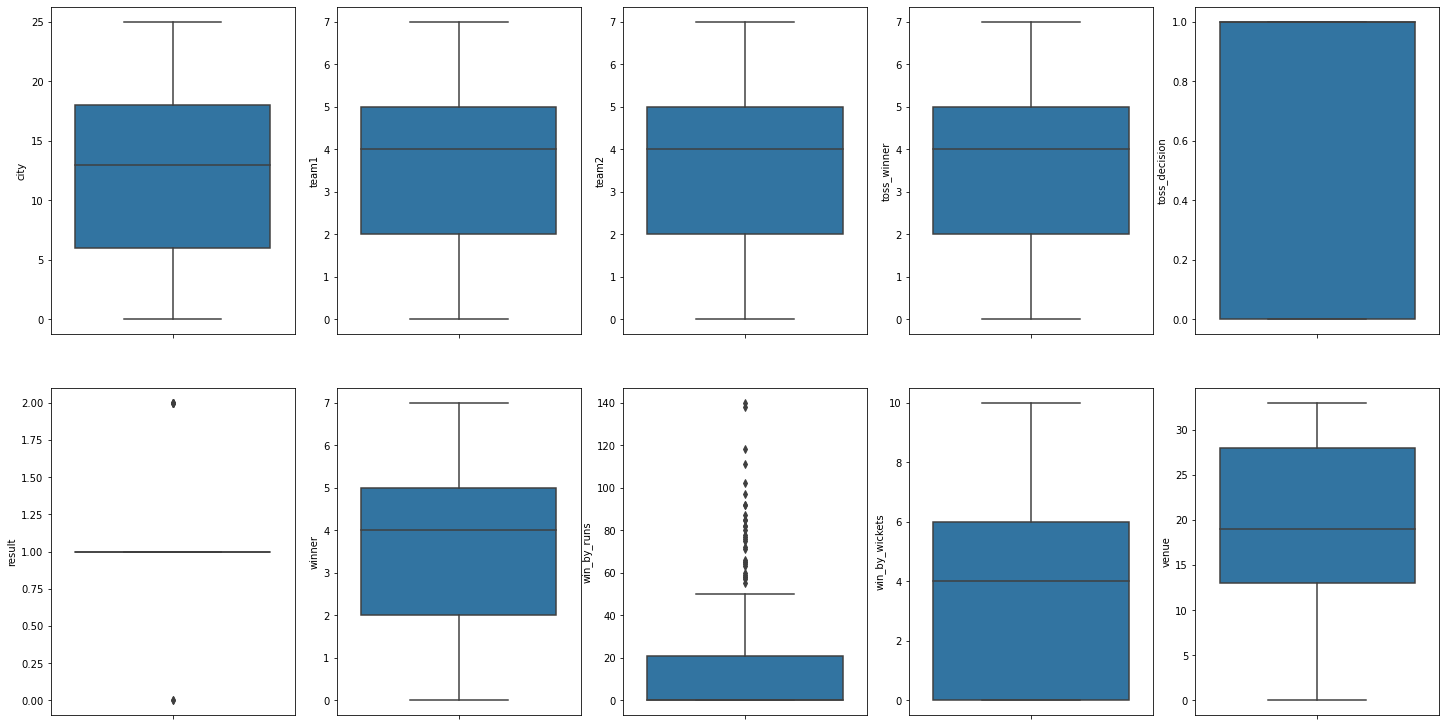

In [50]:
#seeing the outliers
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in matches_2.items():
    sns.boxplot(y=v, data=matches_2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

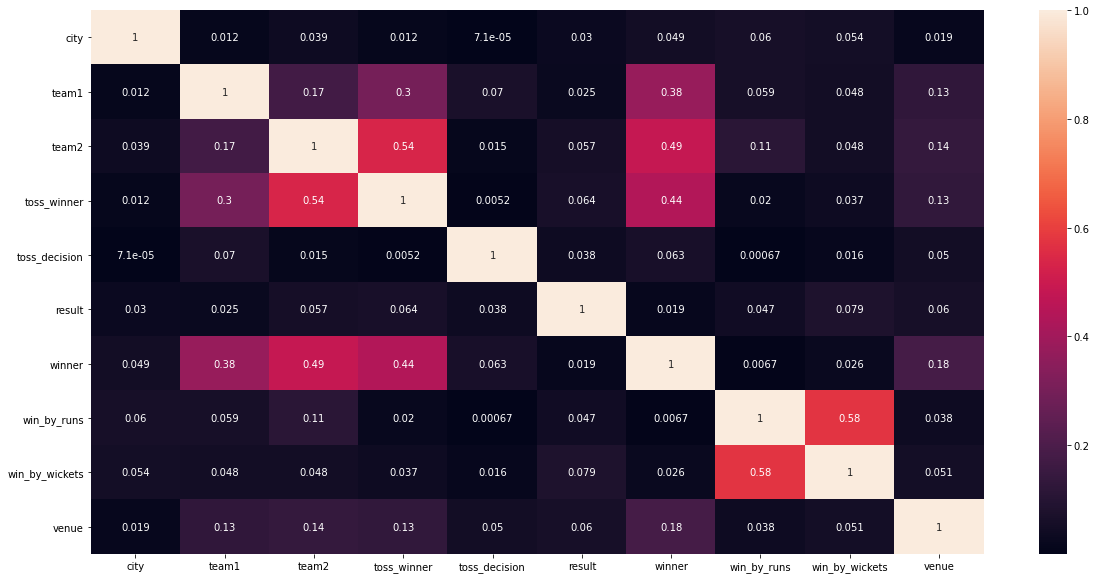

In [51]:
plt.figure(figsize=(20, 10))
sns.heatmap(matches_2.corr().abs(),  annot=True)
plt.show()

In [52]:
matches_2.corr()

,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,venue
city,1.000000,-0.012353,-0.038649,0.011868,-0.000071,-0.029907,-0.048544,-0.059864,0.054355,-0.018903
team1,-0.012353,1.000000,-0.172229,0.297817,0.070139,0.025355,0.378525,-0.059432,0.048131,0.126234
team2,-0.038649,-0.172229,1.000000,0.538762,0.015111,-0.056589,0.486053,0.111269,-0.048487,0.138633
toss_winner,0.011868,0.297817,0.538762,1.000000,0.005184,-0.063618,0.440218,0.020471,0.037179,0.130433
toss_decision,-0.000071,0.070139,0.015111,0.005184,1.000000,-0.038398,0.062973,0.000670,-0.016289,-0.049516
result,-0.029907,0.025355,-0.056589,-0.063618,-0.038398,1.000000,0.019406,-0.046609,-0.078951,0.060315
winner,-0.048544,0.378525,0.486053,0.440218,0.062973,0.019406,1.000000,0.006693,-0.026245,0.183440
win_by_runs,-0.059864,-0.059432,0.111269,0.020471,0.000670,-0.046609,0.006693,1.000000,-0.575232,0.037666
win_by_wickets,0.054355,0.048131,-0.048487,0.037179,-0.016289,-0.078951,-0.026245,-0.575232,1.000000,-0.051125
venue,-0.018903,0.126234,0.138633,0.130433,-0.049516,0.060315,0.183440,0.037666,-0.051125,1.000000


In [53]:
X=matches_2.drop("winner",axis=1)
y=matches_2["winner"]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=0)

In [55]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [56]:
log.fit(X_train,y_train)

C:\Users\Prem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred=log.predict(X_test)

In [58]:
y_pred

array([4, 7, 4, 4, 6, 4, 5, 6, 4, 3, 7, 0, 6, 4, 0, 0, 5, 2, 7, 4, 4, 0,
       5, 2, 5, 5, 2, 6, 2, 6, 7, 4, 6, 6, 6, 3, 3, 2, 4, 5, 4, 0, 4, 6])

In [59]:
y_test

512    4
536    7
599    4
446    4
118    5
36     4
349    3
714    4
695    0
596    4
31     7
696    0
703    7
441    6
541    0
755    4
89     4
200    4
545    5
310    6
751    4
380    2
428    3
440    2
59     2
712    2
684    2
431    5
669    4
663    7
749    5
6      4
159    6
635    7
621    7
122    2
655    0
190    4
298    6
625    5
335    3
752    4
343    2
222    5
Name: winner, dtype: int32

In [60]:
confusion_matrix(y_test, y_pred)

array([[2, 0, 1, 1, 0, 0, 0],
       [1, 2, 1, 1, 2, 0, 0],
       [0, 0, 0, 1, 2, 0, 0],
       [2, 3, 1, 6, 1, 1, 0],
       [0, 0, 0, 0, 1, 3, 2],
       [0, 0, 0, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 4, 2]], dtype=int64)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           2       0.29      0.40      0.33         5
           3       0.00      0.00      0.00         3
           4       0.43      0.50      0.46        12
           5       0.17      0.17      0.17         6
           6       0.25      0.11      0.15         9
           7       0.33      0.50      0.40         4

    accuracy                           0.32        44
   macro avg       0.28      0.30      0.28        44
weighted avg       0.31      0.32      0.30        44



In [62]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.3181818181818182

In [63]:
log.score(X_train,y_train)

0.4071246819338422

In [64]:
# Fitting Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [65]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[2 2 2 0 0 2 2 0 0 2 2 0 0 0 0 0 2 2 1 2 2 0 2 2 5 2 2 2 2 0 2 2 2 0 0 2 0
 2 2 0 2 0 0 2]


In [66]:
accuracy_score(y_pred,y_test)

0.18181818181818182

In [67]:
nvclassifier.score(X_train,y_train)

0.2951653944020356

In [68]:
#Fitting Decision tree Classification
from sklearn.tree import DecisionTreeClassifier

In [69]:
clf_entropy=DecisionTreeClassifier(criterion="gini")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_en=clf_entropy.predict(X_test)

In [71]:
y_pred_en

array([4, 7, 4, 4, 5, 4, 3, 4, 0, 4, 7, 0, 7, 6, 0, 4, 4, 4, 5, 6, 4, 2,
       3, 2, 2, 2, 2, 5, 4, 7, 5, 4, 5, 7, 7, 3, 0, 4, 6, 5, 3, 4, 2, 5])

In [72]:
accuracy_score(y_pred_en,y_test)

0.9545454545454546

In [73]:
clf_entropy.score(X_train,y_train)

1.0